# Sklearn and Natural Language Processing

## 1. Sklearn
[Scikit-learn](https://scikit-learn.org/stable/) is one of the most common general-purpose machine learning libraries (as opposed to more specialized deep learning libraries such as Tensorflow or Pytorch). An advantage of sklearn is that it offers an API for many common machine learning techniques and data processing procedures, in a fairly unified interface.

Here is an example of running a linear regression model by sklearn. Note that we don't specify the number of training iterations here because the `LinearRegression` class in sklearn does not use gradient descent:

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# input data
X = np.array([[0.9, 1.9], [1.95, 1.8], [1.85, 0.45], [1.3, 1.55], [1.9, 1.25]])
y = np.array([-9.5, -6.8,  2.3, -5.9, -2.6])

# init model with hyperparams
model = LinearRegression(fit_intercept = True, normalize = False)

# scale the data
scaler = StandardScaler()
scaler.fit(X)
X_normalized = scaler.transform(X)

# train the model
model.fit(X_normalized, y)

# get the model's weight vector and intercept
print(model.coef_, model.intercept_)

# predict new data point
X_new = np.array([[1, 2], [3, 4], [5, 6]])
print(model.predict(X_new))

[ 0.81913824 -3.57303143] -4.500000000000001
[-10.82692463 -16.33471102 -21.8424974 ]


The sklearn interface is very intuitive to learn, and you can typically see detailed examples in the API page. The typical workflow consists of:

1. Initialize a model with hyperparameters.
1. Call `.fit` on the training data.
1. Call `.predict` or `transform` on the training or testing data.

While `sklearn` is generally a good library to include in any machine learning project, there are two important caveats to keep in mind:

1. Sklearn can be reasonably fast for small to medium-sized datasets ($n \approx 10000, d \approx 1000$), but will be slow for larger datasets. Also the library does not support GPU, although you can sometimes specify the `n_jobs` parameter to use more jobs for the computation.
1. Even simple machine learning methods such as logistic regression can have [many hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) in sklearn. This is, of course, a good feature of sklearn that provides the user with more flexiblity. Howerver, this also means you need a good understanding of these hyperparameters to select those best suited for your dataset. Simply setting all these hyperparameters to their default values does not demonstrate the true utility of sklearn.

## 2. Introduction to Topic Modelling

Topic modeling is a machine learning technique that automatically analyzes text data to uncovering hidden structure in a collection of texts. This is known as unsupervised learning because it doesn’t require a predefined list of tags or training data that’s been previously classified by humans.

There are several existing algorithms you can use to perform the topic modeling. The most common of it are, [Latent Semantic Analysis](https://en.wikipedia.org/wiki/Latent_semantic_analysis) (LSA/LSI), [Probabilistic Latent Semantic Analysis](https://en.wikipedia.org/wiki/Probabilistic_latent_semantic_analysis) (pLSA), and [Latent Dirichlet Allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation) (LDA). In this primer, we will focus on how LDA can be done in sklearn.

### 2.1. Feature construction

There are several ways to construct features from text data. A simple direction, as you have seen in Project 3, is to make use of frequency-based features, by constructing a term-frequency (TF) matrix or a term frequency - inverse document frequency (TF-IDF) matrix. These two methods are supported by sklearn's [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) respectively. These have fairly similar interfaces, which include the following parameters of interest:

* `stop_words`: `english` or `None`. If `english`, a built-in stop word list for English is used.
* `max_df`: when building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold.
* `min_df`: When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. 
* `max_features`: build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
* `ngram_range`: the lower and upper boundary of the range of n-values for different n-grams to be extracted.
* `vocabulary`: either a Mapping (e.g., a `dict`) where keys are terms and values are indices in the feature matrix, or an iterable over terms. If not given, a vocabulary is determined from the input documents.

In [7]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [8]:
data = fetch_20newsgroups(shuffle=True, random_state=0,
                          remove=('headers', 'footers', 'quotes')).data[:200]
tf_vectorizer = CountVectorizer(stop_words='english',max_features=100)
tf = tf_vectorizer.fit_transform(data)

In [9]:
# Sample data
data[:5]

['\n\nKoberg,\n\n\tJust a couple of minor corrections here...\n\n\t1)  The Churches of Christ do not usually believe in speaking in\ntongues, in fact many of them are known for being strongly opposed to\nPentecostal teaching.  You are probably thinking of Church of God in\nChrist, the largest African-American Pentecostal denomination.\n\n\t2)  I\'m not sure what you mean by "signifying believers"  but it\nshould be pointed out that the Assemblies of God does not now, nor has it\never, held that speaking in tongues is the sign that one is a Christian. \nThe doctrine that traditional Pentecostals (including the A/G) maintain is\nthat speaking in tongues is the sign of a second experience after becoming\na Christian in which one is "Baptized in the Holy Spirit"  That may be\nwhat you were referring to, but I point this out because Pentecostals are\nfrequently labeled as believing that you have to speak in tongues in order\nto be a Christian.  Such a position is only held by some groups an

### 2.2. Model training
For an intuitive explanation of LDA, see [this article](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158). In creating an LDA model, we can specify many parameters, for instance:
* `n_components`: the number of topics you want to find in the data
* `learning_method`: method used to update the model components, either `batch` or `online`.
* `random_state`: the seed for random generator  
* `batch_size` : the number of documents to use in each EM iteration.

In [10]:
from sklearn.decomposition import LatentDirichletAllocation

In [11]:
lda = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=0)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

The fitting procedure determines the word distribution of every topic; this information is stored in the `components_` attribute. However, there is a catch: we actually have to normalize to get the probability distributions (without this normalization, the model only contains pseudocounts for how often different words appear per topic).

In [12]:
lda.components_.shape

(10, 100)

In [13]:
lda.components_.sum(axis=1)

array([  27.70422683,   16.42671524,   93.6316962 , 1605.13052239,
         86.13103181,   18.65842836,  891.84392143, 4809.54908248,
       1069.71642777,   27.97202201])

In [14]:
print(tf_vectorizer.get_feature_names())

['04', '0d', '145', '17', '1d9', '1t', '24', '2di', '2tm', '34u', '3t', '6ei', '6um', '75u', '7ey', '86', 'a86', 'available', 'ax', 'b8f', 'based', 'bhj', 'bn', 'c_', 'chz', 'ck', 'com', 'contrib', 'cx', 'd9', 'did', 'didn', 'does', 'don', 'edu', 'export', 'ftp', 'g9v', 'giz', 'going', 'good', 'government', 'help', 'hz', 'includes', 'information', 'just', 'k8', 'karina', 'know', 'like', 'list', 'lk', 'll', 'look', 'm6', 'max', 'motif', 'mv', 'need', 'new', 'number', 'people', 'pl', 'pub', 'ql', 'r6', 'really', 'right', 'rlk', 's6', 'said', 'say', 'sc_', 'scx', 'server', 'set', 'sp', 'sq', 'subject', 'sun', 'support', 't7', 'tar', 'think', 'time', 'tm', 'ub', 'use', 've', 'version', 'w1', 'w7', 'way', 'went', 'widget', 'window', 'wm', 'x_s', 'y_']


## 3. Word2Vec Embeddings
### 3.1. Using Gensim model
Word2Vec is a group of related models that are used to produce word embeddings. These models are shallow, two-layer neural networks that are trained to reconstruct linguistic contexts of words. From this, it is possible to compute the words that are most similar to each other based on a simialrity coefficient. The Word2Vec embedding can be instantiated using the `gensim` package. 

To create a `gensim` model, we can use `gensim.model.Word2Vec()` and provide the appropriate parameters, along with a text corpus (nested list of tokens):

In [19]:
import gensim

corpus =[['one', 'reviewers', 'mentioned', 'would', 'great', 'project'],
 ['good', 'live'],
 ['love', 'comes', 'anything', 'else', 'world']]
model = gensim.models.Word2Vec(sentences=corpus,size=100,window=5,workers=4,min_count=1)

We can use the model to retrieve all vocab words using model.wv.vocab. Some other associated functions that can be used with model include vectors, vector_size, and vectors_norm, most_similar.

In [20]:
model.wv.vocab

{'one': <gensim.models.keyedvectors.Vocab at 0x1a25b8cdd0>,
 'reviewers': <gensim.models.keyedvectors.Vocab at 0x1a25b8ce10>,
 'mentioned': <gensim.models.keyedvectors.Vocab at 0x1a25b8ce50>,
 'would': <gensim.models.keyedvectors.Vocab at 0x1a25b8ce90>,
 'great': <gensim.models.keyedvectors.Vocab at 0x1a25b8cf10>,
 'project': <gensim.models.keyedvectors.Vocab at 0x1a25b8cf90>,
 'good': <gensim.models.keyedvectors.Vocab at 0x1a25b8cfd0>,
 'live': <gensim.models.keyedvectors.Vocab at 0x1a25b99050>,
 'love': <gensim.models.keyedvectors.Vocab at 0x1a25b8ced0>,
 'comes': <gensim.models.keyedvectors.Vocab at 0x1a25b8cf50>,
 'anything': <gensim.models.keyedvectors.Vocab at 0x1a25b99090>,
 'else': <gensim.models.keyedvectors.Vocab at 0x1a25b990d0>,
 'world': <gensim.models.keyedvectors.Vocab at 0x1a25b99110>}

### 2.2 Computing Similarity Matrix

As next steps, the similarity matrix can be computed based on the model. This will return the top 10 words within the text most similar to a given word of interest, along with their similarity coefficients.

In [21]:
model.wv.most_similar('one')

[('comes', 0.2503284215927124),
 ('anything', 0.13731548190116882),
 ('project', 0.1342039704322815),
 ('love', 0.10042938590049744),
 ('would', 0.042820677161216736),
 ('world', 0.01643143780529499),
 ('mentioned', 0.0029866527765989304),
 ('good', -0.036723557859659195),
 ('else', -0.07531142979860306),
 ('reviewers', -0.08000539243221283)]

## 4. t-sne Text Visualization

To visualize text data with t-SNE, we use the `yellowbricks` library, which provides useful functions such as `TSNEVisualizer()` and `FreqDistVisualizer()`.

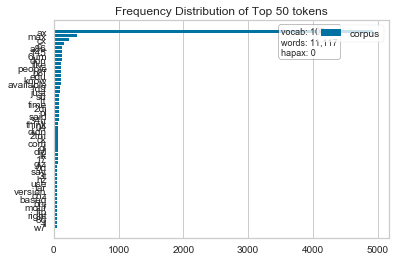

In [30]:
from yellowbrick.text import FreqDistVisualizer, TSNEVisualizer
%matplotlib inline

features = tf_vectorizer.get_feature_names()
freq_visualizer = FreqDistVisualizer(features=features)
freq_visualizer.fit(tf);
freq_visualizer.poof()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


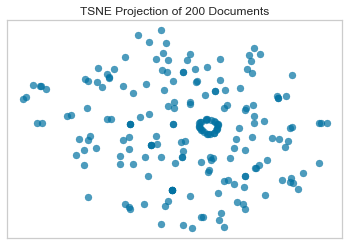

In [32]:
tsne_visualizer = TSNEVisualizer(features=features)
tsne_visualizer.fit(tf);
tsne_visualizer.poof();